<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_17_Matplotlib Histograms.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\alexm\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 🟩 Data Scientist Hourly Salaries (2.17.1)

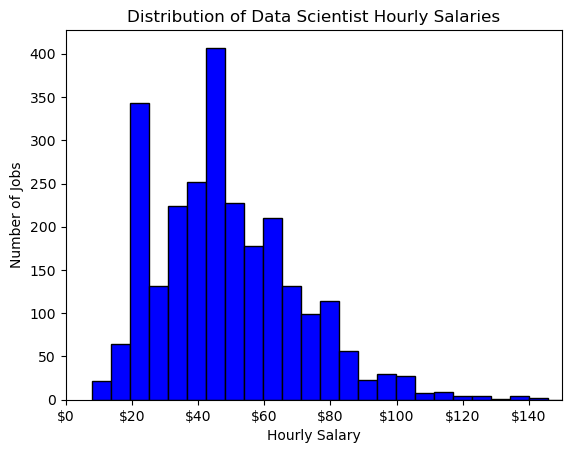

In [10]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(kind='hist', bins=40, edgecolor='black', color='blue')
plt.xlim(0, 150)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

---

## 🟨 Job Postings by Number of Skills (2.17.2)

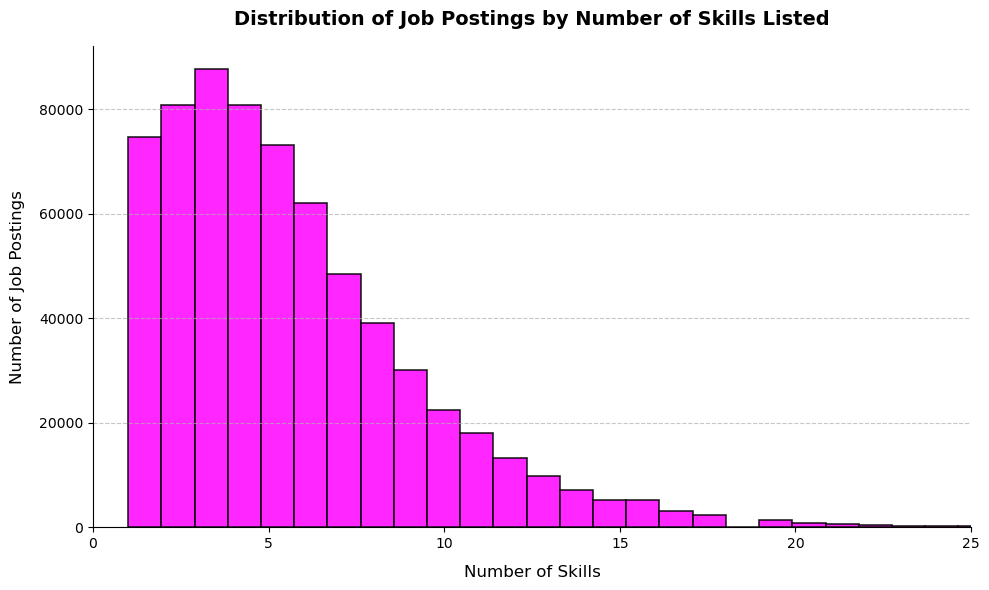

In [19]:
df_skills = df.dropna(subset='job_skills').copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

fig, ax = plt.subplots(figsize=(10, 6))

df_skills['num_skills'].plot(
    kind='hist',
    bins=55,
    edgecolor='black',
    color='magenta',
    linewidth=1.2,
    alpha=0.85,
    ax=ax
)

ax.set_xlim(0, 25)
ax.set_xlabel('Number of Skills', fontsize=12, labelpad=10)
ax.set_ylabel('Number of Job Postings', fontsize=12, labelpad=10)
ax.set_title('Distribution of Job Postings by Number of Skills Listed', fontsize=14, weight='bold', pad=15)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='x', rotation=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

---

## 🟥 Data Engineer Salaries (2.17.3)

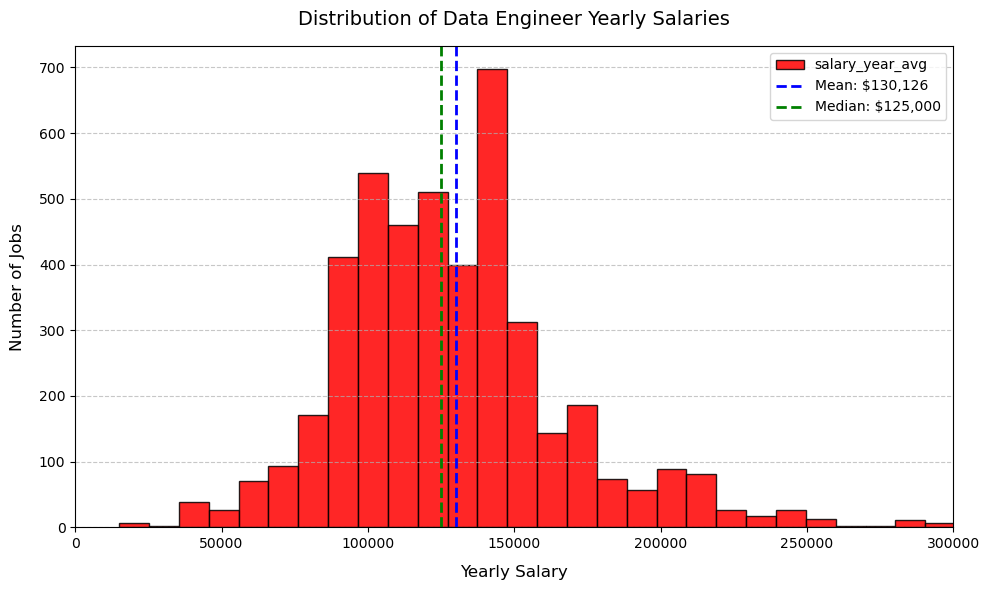

In [ ]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

df_DE = df_DE.dropna(subset=['salary_year_avg'])

df_DE['salary_year_avg'].plot(
    kind='hist',
    bins=50,
    color='red',
    edgecolor='black',
    alpha=0.85,
    figsize=(10, 6)
)
plt.xlim(0, 300000)
# Calculate mean and median
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

# Add vertical lines for mean and median
plt.axvline(mean_salary, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', linewidth=2, label=f'Median: ${median_salary:,.0f}')

# Set labels and title
plt.xlabel('Yearly Salary', fontsize=12, labelpad=10)
plt.ylabel('Number of Jobs', fontsize=12, labelpad=10)
plt.title('Distribution of Data Engineer Yearly Salaries', fontsize=14, pad=15)

# Grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

---